In [2]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pandas as pd
from pmprophet.model import PMProphet

In [3]:
df = pd.read_csv("example_wp_log_peyton_manning.csv")
df = df.head(180)
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
# Fit both growth and intercept
m = PMProphet(df, growth=True, intercept=True, n_changepoints=25, changepoints_prior_scale=.01, name='model')

# Add monthly seasonality (order: 3)
m.add_seasonality(seasonality=30, fourier_order=3)

# Add weekly seasonality (order: 3)
m.add_seasonality(seasonality=7, fourier_order=3)

In [5]:
# Fit the model (using NUTS)
m.fit(method='NUTS')

INFO (theano.gof.compilelock): Refreshing lock /Users/twiecki/.theano/compiledir_Darwin-18.2.0-x86_64-i386-64bit-i386-3.6.6-64/lock_dir/lock
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [intercept_model, changepoints_model, growth_model, seasonality_model, sigma_model]
Sampling 4 chains: 100%|██████████| 4000/4000 [04:16<00:00,  7.75draws/s]
/Users/twiecki/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


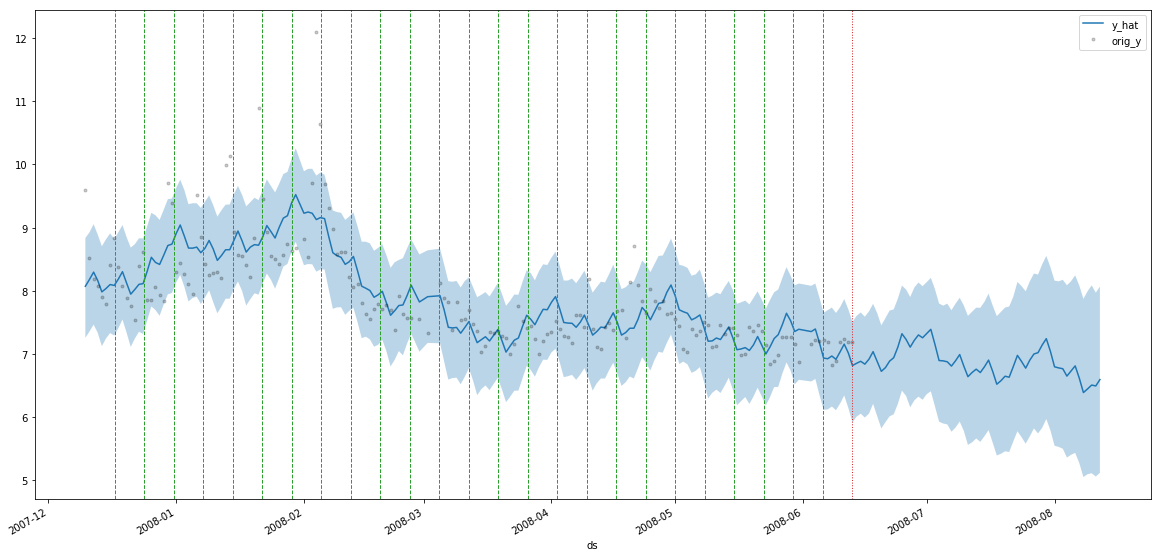

In [8]:
ddf = m.predict(60, alpha=0.2, include_history=True, plot=True)

In [9]:
ddf.head()

,y_hat,y_high,y_low,ds,orig_y
0,8.070621,8.835027,7.253406,2007-12-10,9.590761
1,8.178858,8.924845,7.354951,2007-12-11,8.519590
2,8.294433,9.053727,7.462963,2007-12-12,8.183677
3,8.160484,8.888756,7.333476,2007-12-13,8.072467
4,7.981883,8.704680,7.121337,2007-12-14,7.893572


/Users/twiecki/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


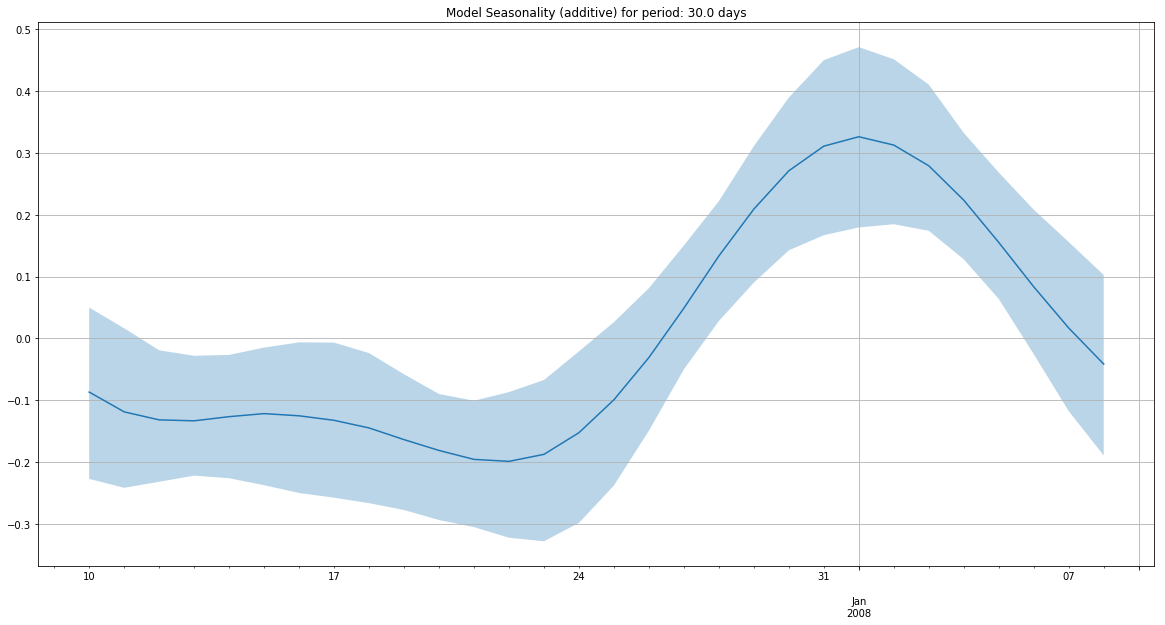

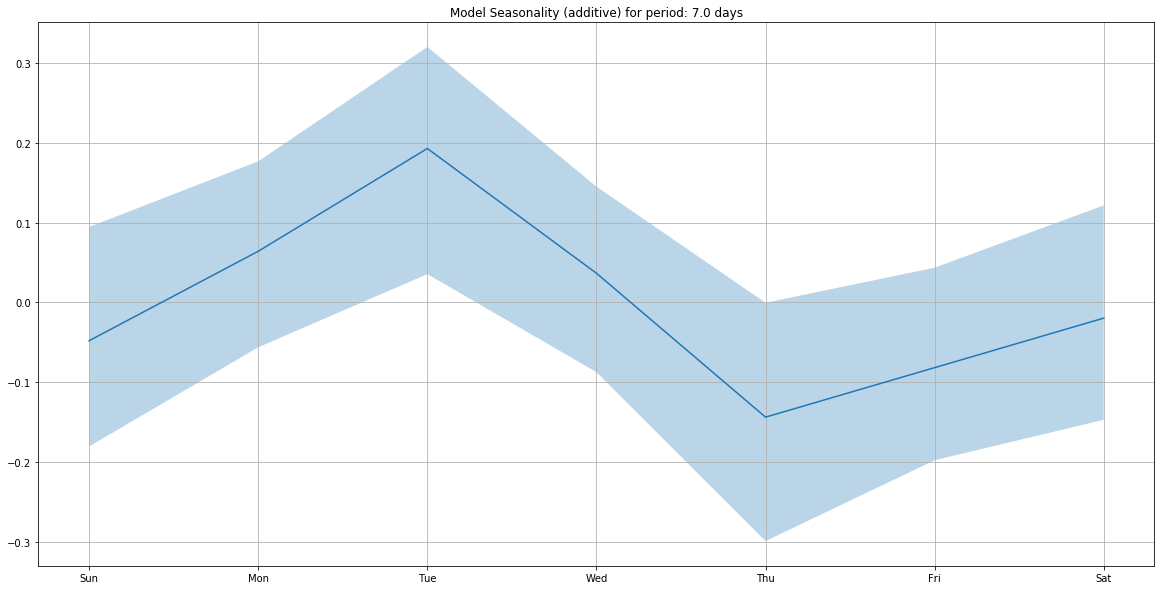

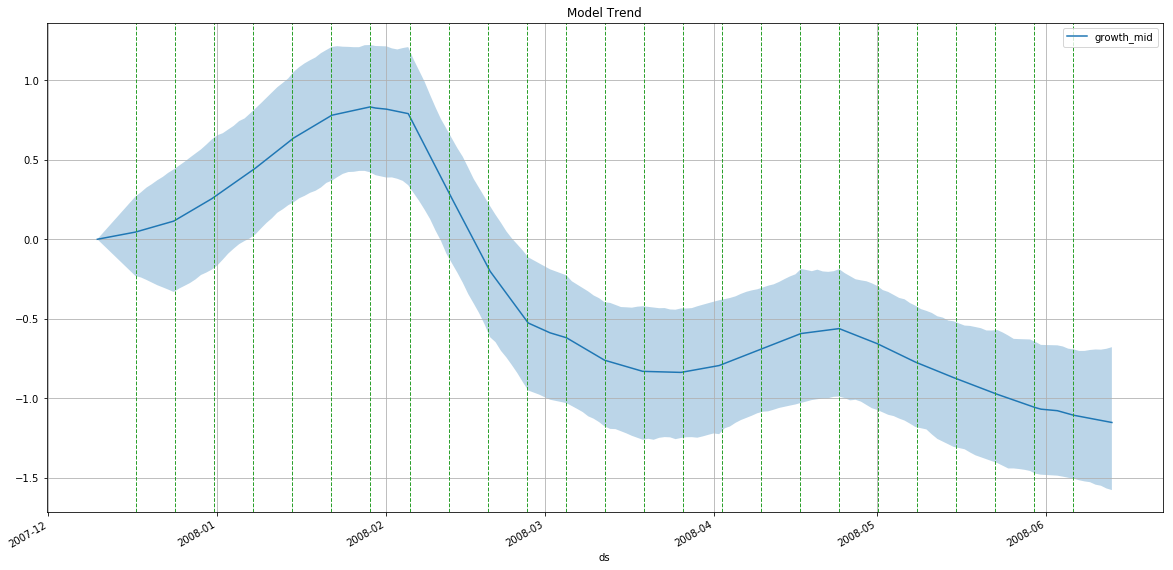

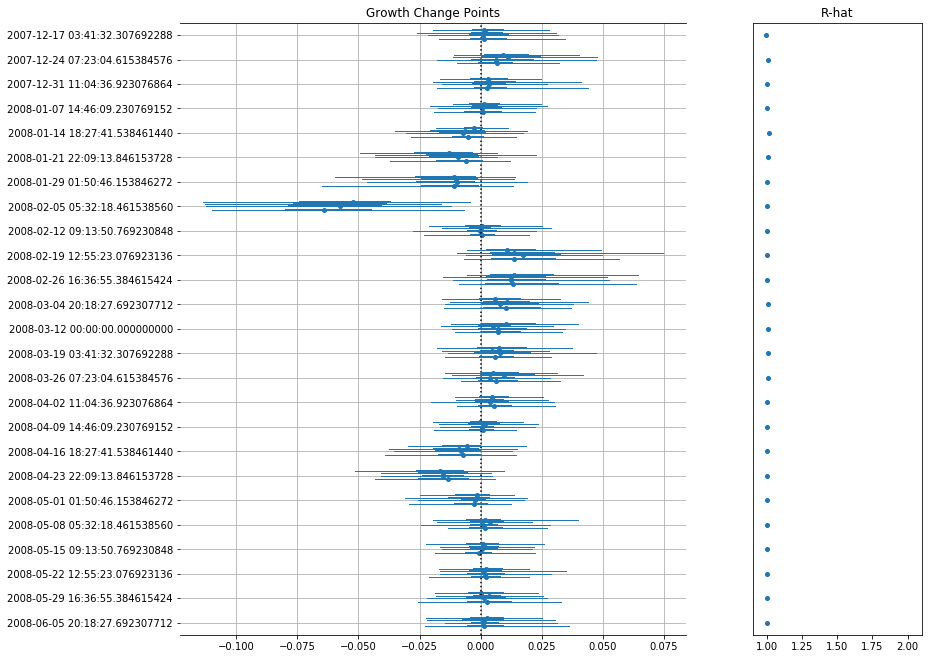

In [10]:
m.plot_components(
    intercept=False,
)